### Import Library

In [15]:
import numpy as np
import matplotlib.pyplot as plt

### Simple Benchmark Function

In [16]:
def Get_F(F):
    """
    Returns (lb, ub, dim, f_obj) depending on the string F.
    f_obj is a callable function that evaluates the objective.
    """

    if F == 'F1':
        lb, ub, dim = -100, 100, 30
        f_obj = F1
    elif F == 'F2':
        lb, ub, dim = -10, 10, 30
        f_obj = F2
    elif F == 'F3':
        lb, ub, dim = -100, 100, 30
        f_obj = F3
    elif F == 'F4':
        lb, ub, dim = -100, 100, 30
        f_obj = F4
    elif F == 'F5':
        lb, ub, dim = -30, 30, 30
        f_obj = F5
    elif F == 'F6':
        lb, ub, dim = -100, 100, 30
        f_obj = F6
    elif F == 'F7':
        lb, ub, dim = -1.28, 1.28, 30
        f_obj = F7
    elif F == 'F8':
        lb, ub, dim = -500, 500, 30
        f_obj = F8
    elif F == 'F9':
        lb, ub, dim = -5.12, 5.12, 30
        f_obj = F9
    elif F == 'F10':
        lb, ub, dim = -32, 32, 30
        f_obj = F10
    elif F == 'F11':
        lb, ub, dim = -600, 600, 30
        f_obj = F11
    elif F == 'F12':
        lb, ub, dim = -50, 50, 30
        f_obj = F12
    elif F == 'F13':
        lb, ub, dim = -50, 50, 30
        f_obj = F13
    elif F == 'F14':
        lb, ub, dim = -65.536, 65.536, 2
        f_obj = F14
    elif F == 'F15':
        lb, ub, dim = -5, 5, 4
        f_obj = F15
    elif F == 'F16':
        lb, ub, dim = -5, 5, 2
        f_obj = F16
    elif F == 'F17':
        lb, ub, dim = [-5, 0], [10, 15], 2
        f_obj = F17
    elif F == 'F18':
        lb, ub, dim = -2, 2, 2
        f_obj = F18
    elif F == 'F19':
        lb, ub, dim = 0, 1, 3
        f_obj = F19
    elif F == 'F20':
        lb, ub, dim = 0, 1, 6
        f_obj = F20
    elif F == 'F21':
        lb, ub, dim = 0, 10, 4
        f_obj = F21
    elif F == 'F22':
        lb, ub, dim = 0, 10, 4
        f_obj = F22
    elif F == 'F23':
        lb, ub, dim = 0, 10, 4
        f_obj = F23
    else:
        raise ValueError("Invalid function name provided.")

    return lb, ub, dim, f_obj


def F1(x):
    return np.sum(x**2)

def F2(x):
    return np.sum(np.abs(x)) + np.prod(np.abs(x))

def F3(x):
    dim = len(x)
    total = 0
    for i in range(dim):
        total += np.sum(x[:i+1])**2
    return total

def F4(x):
    return np.max(np.abs(x))

def F5(x):
    dim = len(x)
    return np.sum(100 * (x[1:dim] - x[:dim-1]**2)**2 + (x[:dim-1] - 1)**2)

def F6(x):
    return np.sum(np.abs(x + 0.5)**2)

def F7(x):
    dim = len(x)
    # sum_{j=1 to dim}[ j*(x_j^4) ] + random
    indices = np.arange(1, dim+1)
    return np.sum(indices * (x**4)) + np.random.random()

def F8(x):
    return np.sum(-x * np.sin(np.sqrt(np.abs(x))))

def F9(x):
    dim = len(x)
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x)) + 10 * dim

def F10(x):
    dim = len(x)
    return -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / dim)) \
           - np.exp(np.sum(np.cos(2 * np.pi * x)) / dim) + 20 + np.e

def F11(x):
    dim = len(x)
    return np.sum(x**2) / 4000 \
           - np.prod(np.cos(x / np.sqrt(np.arange(1, dim+1)))) + 1

def F12(x):
    dim = len(x)
    term1 = 10 * (np.sin(np.pi * (1 + (x[0] + 1) / 4)))**2
    sums = 0
    for i in range(dim - 1):
        xi = (x[i] + 1) / 4
        sums += (xi**2) * (1 + 10 * (np.sin(np.pi * (1 + (x[i+1] + 1) / 4)))**2)
    term_last = ((x[-1] + 1) / 4)**2

    pi_dim = np.pi / dim
    val = pi_dim * (term1 + sums + term_last)
    val += np.sum(Ufun(x, 10, 100, 4))
    return val

def F13(x):
    dim = len(x)
    term1 = (np.sin(3 * np.pi * x[0]))**2
    sums = 0
    for i in range(dim - 1):
        sums += (x[i] - 1)**2 * (1 + (np.sin(3 * np.pi * x[i+1]))**2)
    term_last = (x[-1] - 1)**2 * (1 + (np.sin(2 * np.pi * x[-1]))**2)

    val = 0.1 * (term1 + sums + term_last)
    val += np.sum(Ufun(x, 5, 100, 4))
    return val

def F14(x):
    aS = np.array([
       [-32, -16,   0, 16,  32, -32, -16,   0, 16,  32, -32, -16,   0, 16,  32, -32, -16,   0, 16,  32, -32, -16,   0, 16,  32],
       [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16,   0,   0,   0,   0,   0,  16,  16,  16, 16,  16,  32,  32,  32, 32,  32]
    ], dtype=float)

    bS = np.zeros(25)
    for j in range(25):
        diff = x - aS[:, j]
        bS[j] = np.sum(diff**6)

    val = (1.0 / 500 + np.sum(1.0 / (np.arange(1, 26) + bS)))**(-1)
    return val

def F15(x):
    aK = np.array([0.1957, 0.1947, 0.1735, 0.16, 0.0844,
                   0.0627, 0.0456, 0.0342, 0.0323, 0.0235, 0.0246])
    bK = np.array([0.25, 0.5, 1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    bK = 1.0 / bK

    num = x[0] * (bK**2 + x[1] * bK)
    den = bK**2 + x[2] * bK + x[3]
    return np.sum((aK - num / den)**2)

def F16(x):
    return 4 * (x[0]**2) - 2.1 * (x[0]**4) + (x[0]**6) / 3 \
           + x[0] * x[1] - 4 * (x[1]**2) + 4 * (x[1]**4)

def F17(x):
    return (x[1] - (x[0]**2) * 5.1 / (4 * (np.pi**2)) + 5.0 / np.pi * x[0] - 6)**2 \
           + 10 * (1 - 1 / (8 * np.pi)) * np.cos(x[0]) + 10

def F18(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2
           - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) \
           * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2
           + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

def F19(x):
    aH = np.array([
        [3.0,  10.0, 30.0],
        [0.1,  10.0, 35.0],
        [3.0,  10.0, 30.0],
        [0.1,  10.0, 35.0]
    ])
    cH = np.array([1.0, 1.2, 3.0, 3.2])
    pH = np.array([
        [0.3689, 0.1170, 0.2673],
        [0.4699, 0.4387, 0.7470],
        [0.1091, 0.8732, 0.5547],
        [0.03815, 0.5743, 0.8828]
    ])
    val = 0
    for i in range(4):
        val -= cH[i] * np.exp(-np.sum(aH[i, :] * (x - pH[i, :])**2))
    return val

def F20(x):
    aH = np.array([
        [10,   3,   17,  3.5,  1.7,   8 ],
        [0.05, 10,  17,  0.1,  8,    14],
        [3,   3.5,  1.7, 10,   17,    8 ],
        [17,   8,  0.05, 10,   0.1,  14]
    ])
    cH = np.array([1.0, 1.2, 3.0, 3.2])
    pH = np.array([
        [0.1312, 0.1696, 0.5569, 0.0124, 0.8283, 0.5886],
        [0.2329, 0.4135, 0.8307, 0.3736, 0.1004, 0.9991],
        [0.2348, 0.1415, 0.3522, 0.2883, 0.3047, 0.6650],
        [0.4047, 0.8828, 0.8732, 0.5743, 0.1091, 0.0381]
    ])
    val = 0
    for i in range(4):
        val -= cH[i] * np.exp(-np.sum(aH[i, :] * (x - pH[i, :])**2))
    return val

def F21(x):
    aSH = np.array([
        [4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7],
        [2,9,2,9],
        [5,5,3,3],
        [8,1,8,1],
        [6,2,6,2],
        [7,3.6,7,3.6]
    ])
    cSH = np.array([0.1,0.2,0.2,0.4,0.4,0.6,0.3,0.7,0.5,0.5])

    val = 0
    for i in range(5):
        diff = x - aSH[i,:]
        val -= 1.0 / (np.dot(diff, diff) + cSH[i])
    return val

def F22(x):
    aSH = np.array([
        [4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7],
        [2,9,2,9],
        [5,5,3,3],
        [8,1,8,1],
        [6,2,6,2],
        [7,3.6,7,3.6]
    ])
    cSH = np.array([0.1,0.2,0.2,0.4,0.4,0.6,0.3,0.7,0.5,0.5])

    val = 0
    for i in range(7):
        diff = x - aSH[i,:]
        val -= 1.0 / (np.dot(diff, diff) + cSH[i])
    return val

def F23(x):
    aSH = np.array([
        [4,4,4,4],
        [1,1,1,1],
        [8,8,8,8],
        [6,6,6,6],
        [3,7,3,7],
        [2,9,2,9],
        [5,5,3,3],
        [8,1,8,1],
        [6,2,6,2],
        [7,3.6,7,3.6]
    ])
    cSH = np.array([0.1,0.2,0.2,0.4,0.4,0.6,0.3,0.7,0.5,0.5])

    val = 0
    for i in range(10):
        diff = x - aSH[i,:]
        val -= 1.0 / (np.dot(diff, diff) + cSH[i])
    return val

def Ufun(x, a, k, m):
    """
    Ufun(x,a,k,m) = k*(x-a)^m*(x>a) + k*(-x-a)^m*(x<(-a)) element-wise
    """
    x = np.array(x)
    mask_pos = (x > a)
    mask_neg = (x < -a)

    val = np.zeros_like(x, dtype=float)
    val[mask_pos] = k * ((x[mask_pos] - a)**m)
    val[mask_neg] = k * ((-x[mask_neg] - a)**m)
    return val

### Define Optimizer

#### Artificial Circulation System Algorithm (ACSA)



In [17]:
class ACSA:
    def __init__(self, obj_func, lb, ub, dim, pop_size=20, NH_rate=0.1, S=0.1, max_iter=50):
        self.obj_func = obj_func
        self.lb = np.array(lb)
        self.ub = np.array(ub)
        self.dim = dim
        self.pop_size = pop_size
        self.NH_rate = NH_rate
        self.S = S
        self.max_iter = max_iter

        # Parametreler
        self.Ea_neural = 1.8
        self.Es_neural = 0.002
        self.Ea_hormonal = 0.66
        self.Es_hormonal = 0.33

    def stimulation(self, x, regulator_type):
        Ea = self.Ea_neural if regulator_type == 'neural' else self.Ea_hormonal
        Es = self.Es_neural if regulator_type == 'neural' else self.Es_hormonal
        sf = (self.ub - self.lb) * self.S / (1 + np.exp(Ea * (-x + Es)))
        return sf

    def initialize_population(self):
        self.pop = np.random.uniform(self.lb, self.ub, (self.pop_size, self.dim))
        self.fitness = np.array([self.obj_func(ind) for ind in self.pop])
        self.best_idx = np.argmin(self.fitness)
        self.best_solution = self.pop[self.best_idx].copy()

    def gruped_population(self):
        sorted_idx = np.argsort(self.fitness)[::-1]
        neural_size = int(self.pop_size * self.NH_rate)
        self.neural_pop = sorted_idx[:neural_size]
        self.hormonal_pop = sorted_idx[neural_size:]

    def update_neural(self, idx):
        sf = self.stimulation(self.pop[idx], 'neural')
        new_pos = np.random.rand(self.dim) * sf
        new_pos = np.clip(new_pos, self.lb, self.ub)
        new_fit = self.obj_func(new_pos)
        if new_fit < self.fitness[idx]:
            self.pop[idx] = new_pos
            self.fitness[idx] = new_fit
        return

    def update_hormonal(self, idx):
        pop_mean = np.mean(self.pop, axis=0)
        if np.random.rand() < 0.5:
            sf = self.stimulation(self.pop[idx], 'hormonal')
            new_pos = pop_mean + np.random.rand(self.dim) * sf
        else:
            new_pos = self.best_solution + np.random.rand(self.dim) * (pop_mean - self.pop[idx])
        new_pos = np.clip(new_pos, self.lb, self.ub)
        new_fit = self.obj_func(new_pos)
        if new_fit < self.fitness[idx]:
            self.pop[idx] = new_pos
            self.fitness[idx] = new_fit
        return

    def optimize(self):
        self.initialize_population()
        convergence = []
        for iter in range(self.max_iter):
            self.gruped_population()

            # Nöral güncelleme (kötü bireyler)
            for idx in self.neural_pop:
                self.update_neural(idx)

            # Hormonal güncelleme (iyi bireyler)
            for idx in self.hormonal_pop:
                self.update_hormonal(idx)

            # En iyi çözümü güncelle
            current_best = np.min(self.fitness)
            if current_best < self.obj_func(self.best_solution):
                self.best_solution = self.pop[np.argmin(self.fitness)].copy()

            convergence.append(current_best)

        return self.best_solution, convergence

    def run(self):
        """
        ACSA algoritmasını çalıştırır ve en iyi çözümü döner.
        """
        best_solution, convergence = self.optimize()
        best_fitness = convergence[-1]
        return best_fitness, best_solution, convergence


### Main Function

In [30]:
p_size = 200
MaxIter = 100

lb, ub, dim, fobj = Get_F("F9")

# ACSA algoritmasını başlat
acsa = ACSA(obj_func=fobj, lb=lb, ub=ub, dim=dim, pop_size=p_size, NH_rate=0.1, S=0.01, max_iter=MaxIter)
fitness, solution, convergence = acsa.run()


# Print Results

In [31]:
# Sonuçları yazdır
print(f"Best Fitness: {fitness}")

Best Fitness: 0.18424781145051838


In [32]:
print(f"Best Solution: {solution}")

Best Solution: [ 0.00353025  0.01195755  0.00842792  0.00118614  0.00388545 -0.00126247
  0.0043022   0.00992929  0.0029065   0.00668164 -0.00205159  0.00864011
  0.00758713  0.00121741 -0.0071329   0.00732587  0.00239255  0.00078925
  0.00658367  0.0007257   0.00021146  0.00887105  0.00119207  0.00435947
  0.00022707  0.0047912   0.00660981  0.00103139  0.00573932  0.00464907]


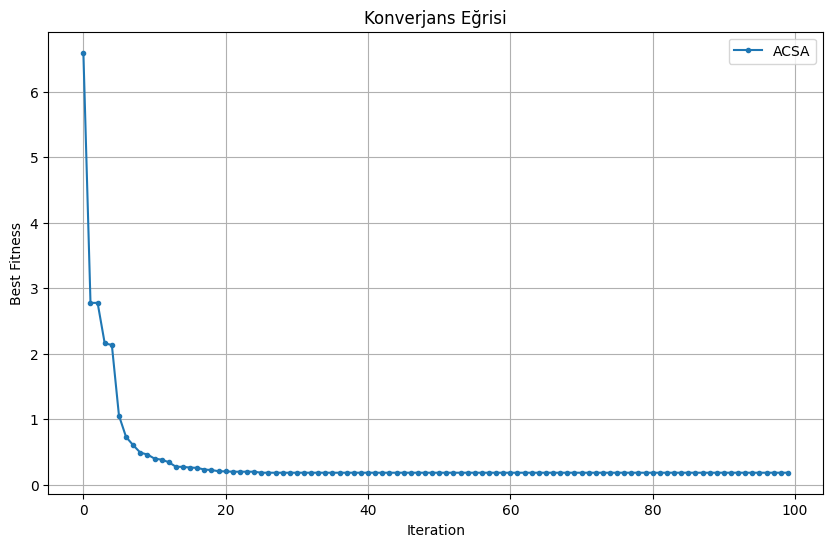

In [33]:
# Konverjans eğrilerini çiz
plt.figure(figsize=(10, 6))
plt.plot(convergence, marker='.', label='ACSA')
plt.title('Konverjans Eğrisi')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.legend()
plt.grid()
plt.show()